In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib import animation
from matplotlib.animation import PillowWriter

plt.style.use(["science", "notebook", "grid"])
mpl.rcParams["text.usetex"] = True

In [2]:
x = np.linspace(0, 10, 1000)
t = np.arange(0, 10, 1/60)
X, T = np.meshgrid(x, t)

def y(x, t): return 2 * np.sin(x) * np.sin(t) 
Y = y(X, T)
def p(x, t): return -np.sin(2*x) * np.sin(2*t) 
P = p(X, T)
def u_d(x, t): return 2 * np.cos(x)**2 * np.sin(t)**2 
U_D = u_d(X, T)
def u_k(x, t): return 2 * np.sin(x)**2 * np.cos(t)**2 
U_K = u_k(X, T)

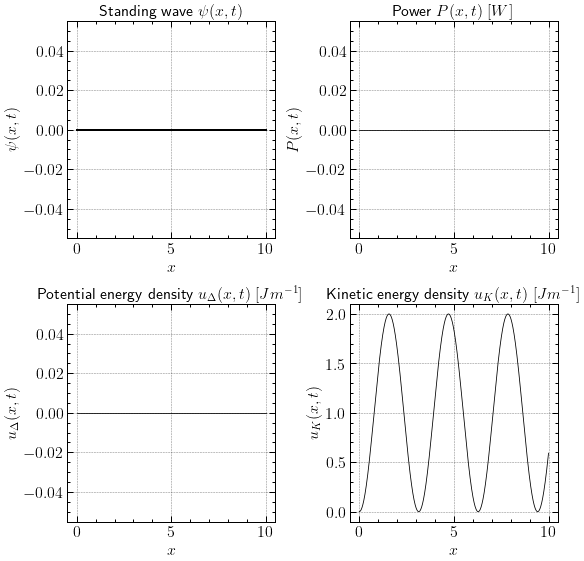

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8), tight_layout=True)

ax = axes[0][0]
ax.plot(x, Y[0], color="black")
ax.set_xlabel(r"$x$") ; ax.set_ylabel(r"$\psi(x, t)$") ; ax.set_title(r"Standing wave $\psi(x,t)$")
plt.rcParams["lines.linewidth"] = 0.8

ax = axes[0][1]
ax.plot(x, P[0], color="black")
ax.set_xlabel(r"$x$") ; ax.set_ylabel(r"$P(x, t)$") ; ax.set_title(r"Power $P(x,t)$  $[W]$")
plt.rcParams["lines.linewidth"] = 0.8

ax = axes[1][0]
ax.plot(x, U_D[0], color="black")
ax.set_xlabel(r"$x$") ; ax.set_ylabel(r"$u_{\Delta}(x, t)$") ; ax.set_title(r"Potential energy density $u_{\Delta}(x,t)$  $[J m^{-1}]$")
plt.rcParams["lines.linewidth"] = 0.8

ax = axes[1][1]
ax.plot(x, U_K[0], color="black")
ax.set_xlabel(r"$x$") ; ax.set_ylabel(r"$u_{K}(x,t)$") ; ax.set_title(r"Kinetic energy density $u_{K}(x,t)$  $[J m^{-1}]$")
plt.rcParams["lines.linewidth"] = 0.8

plt.show()

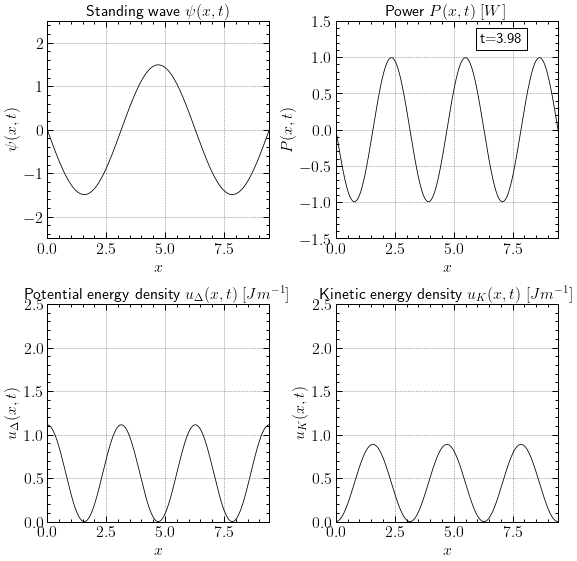

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8), tight_layout=True)

ax = axes[0][0]
ln1, = ax.plot([], [], color="black")
ax.set_xlim(0, 3*np.pi) ; ax.set_ylim(-2.5, 2.5)
ax.set_xlabel(r"$x$") ; ax.set_ylabel(r"$\psi(x, t)$") ; ax.set_title(r"Standing wave $\psi(x,t)$")
plt.rcParams["lines.linewidth"] = 0.8

ax = axes[0][1]
ln2, = ax.plot([], [], color="black")
ax.set_xlim(0, 3*np.pi) ; ax.set_ylim(-1.5, 1.5)
ax.set_xlabel(r"$x$") ; ax.set_ylabel(r"$P(x, t)$") ; ax.set_title(r"Power $P(x,t)$  $[W]$")
plt.rcParams["lines.linewidth"] = 0.8

time_text = ax.text(0.65, 0.90, '', fontsize=15,
                    bbox=dict(facecolor='white', edgecolor='black'), 
                    transform=ax.transAxes)

ax = axes[1][0]
ln3, = ax.plot([], [], color="black")
ax.set_xlim(0, 3*np.pi) ; ax.set_ylim(0, 2.5)
ax.set_xlabel(r"$x$") ; ax.set_ylabel(r"$u_{\Delta}(x, t)$") ; ax.set_title(r"Potential energy density $u_{\Delta}(x,t)$  $[J m^{-1}]$")
plt.rcParams["lines.linewidth"] = 0.8

ax = axes[1][1]
ln4, = ax.plot([], [], color="black")
ax.set_xlim(0, 3*np.pi) ; ax.set_ylim(0, 2.5)
ax.set_xlabel(r"$x$") ; ax.set_ylabel(r"$u_{K}(x,t)$") ; ax.set_title(r"Kinetic energy density $u_{K}(x,t)$  $[J m^{-1}]$")
plt.rcParams["lines.linewidth"] = 0.8 



def animate(i):
    ln1.set_data(x, Y[i])
    ln2.set_data(x, P[i])
    ln3.set_data(x, U_D[i])
    ln4.set_data(x, U_K[i])
    time_text.set_text('t={:.2f}'.format(i/60))
    
ani = animation.FuncAnimation(fig, animate, frames=240, interval=50)
ani.save('Standing Wave.gif',writer='pillow',fps=50,dpi=100)